# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import silhouette_score

# Data load

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Data/MLCLUP10_Cardiacc.csv')
df

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0,no
885,1,0,1,0,1,0,0,0,1,0,0,0,no
886,1,0,0,1,1,0,0,0,1,0,0,0,yes
887,2,0,1,0,0,0,0,1,1,0,0,0,no


# Preprocessing

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,889.0,1.258718,0.500557,0.0,1.0,1.0,2.0,2.0
Chain_smoker,889.0,0.120360,0.325565,0.0,0.0,0.0,0.0,1.0
Consumes_other_tobacco_products,889.0,0.838020,0.368640,0.0,1.0,1.0,1.0,1.0
HighBP,889.0,0.086614,0.281427,0.0,0.0,0.0,0.0,1.0
Obese,889.0,0.919010,0.272973,0.0,1.0,1.0,1.0,1.0
Diabetes,889.0,0.055118,0.228339,0.0,0.0,0.0,0.0,1.0
Metabolic_syndrome,889.0,0.042745,0.202395,0.0,0.0,0.0,0.0,1.0
Use_of_stimulant_drugs,889.0,0.082115,0.274694,0.0,0.0,0.0,0.0,1.0
Family_history,889.0,0.925759,0.262310,0.0,1.0,1.0,1.0,1.0
History_of_preeclampsia,889.0,0.017998,0.133018,0.0,0.0,0.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


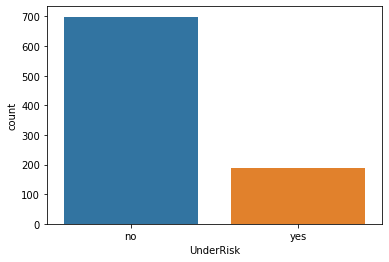

In [ ]:
sns.countplot('UnderRisk',data=df)

In [ ]:
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=le.fit_transform(df['UnderRisk'])
df1=pd.DataFrame(df1,columns=['underRisk'])
df2=pd.concat([df,df1],axis=1)
df2.drop(['UnderRisk'],axis=1,inplace=True)

In [ ]:
df2

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,underRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0,0
885,1,0,1,0,1,0,0,0,1,0,0,0,0
886,1,0,0,1,1,0,0,0,1,0,0,0,1
887,2,0,1,0,0,0,0,1,1,0,0,0,0


In [ ]:
x=df2.drop(['underRisk'],axis=1)
y=df2['underRisk']

# Kmeans Clusturing


In [ ]:
model=KMeans(2)
model.fit(x)

KMeans(n_clusters=2)

In [ ]:
wcss=[]
for f in range(1, 11):
  md=KMeans(n_clusters = f)
  md.fit(x)
  wcss.append(md.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


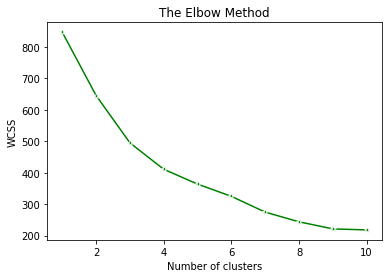

In [ ]:
sns.lineplot(range(1,11),wcss,marker='*',color='g')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model=KMeans(8)
model.fit(x)

KMeans()

In [ ]:
prd=model.predict(x)

In [ ]:
model.cluster_centers_

array([[ 1.38888889e+00, -1.38777878e-17,  1.00000000e+00,
         8.33333333e-02, -2.22044605e-16,  2.77777778e-02,
         2.77777778e-02,  1.00000000e+00,  1.00000000e+00,
        -6.93889390e-18,  2.77777778e-02,  5.55555556e-02],
       [ 9.57104558e-01, -8.32667268e-17,  1.00000000e+00,
        -8.32667268e-17,  1.00000000e+00,  8.31099196e-02,
         5.55111512e-17, -2.49800181e-16,  9.78552279e-01,
         2.94906166e-02,  1.87667560e-02,  7.63278329e-17],
       [ 1.15942029e+00,  2.17391304e-01,  7.24637681e-01,
         1.00000000e+00,  1.00000000e+00,  1.44927536e-02,
        -2.77555756e-17,  0.00000000e+00,  1.00000000e+00,
         1.44927536e-02,  1.44927536e-02,  0.00000000e+00],
       [ 1.00000000e+00,  1.11111111e-01,  1.94444444e-01,
         2.77777778e-02, -2.22044605e-16,  8.33333333e-02,
         1.00000000e+00,  1.00000000e+00,  5.55555556e-02,
        -6.93889390e-18, -6.93889390e-18, -6.93889390e-18],
       [ 2.00000000e+00,  3.36538462e-02,  9.6153846

In [ ]:
score = silhouette_score(x, prd)
score

0.6307565420371948

In [ ]:
df2['cluster']=prd
df2.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,underRisk,cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,0,6
1,1,0,1,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,0,3


# Comparison

In [ ]:
x1 = df2[df2.cluster==0]
y1 = df2[df2.cluster==1]
z1 = df2[df2.cluster==2]

In [ ]:
bfit=SelectKBest(chi2,k=10)
fit=bfit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfscores

,0
0,0.920479
1,15.824730
2,0.615212
3,14.175274
4,0.041538
5,0.263301
6,5.868170
7,0.551820
8,1.438681
9,4.349070


In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['features','impact']
top=featureScores.nlargest(5,'impact')
l1=list(top['features'])
l1


['Chain_smoker',
 'HighBP',
 'Metabolic_syndrome',
 'CABG_history',
 'Respiratory_illness']

In [ ]:
def plo(c):
  for i in l1:
    plt.figure()
    sns.countplot(c[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

(None,)

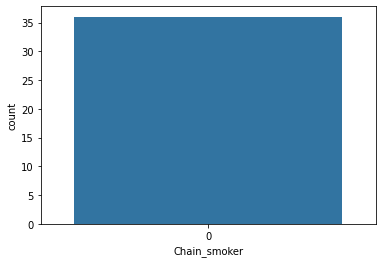

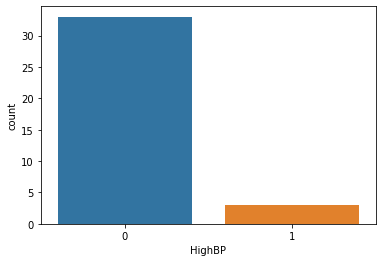

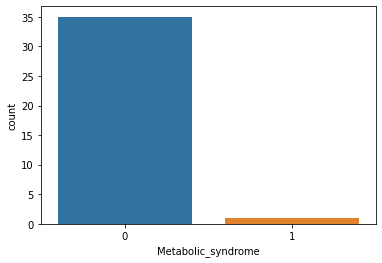

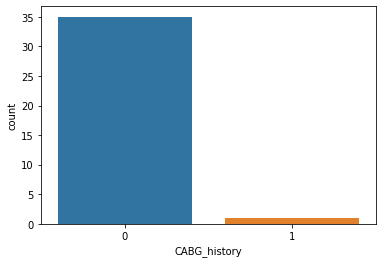

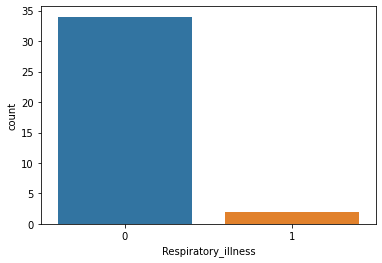

In [ ]:
plo(x1),

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

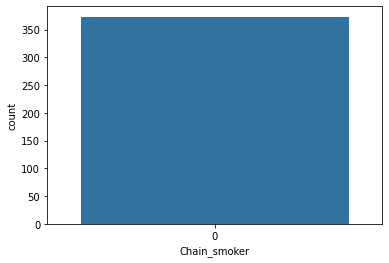

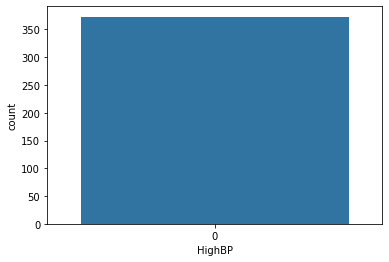

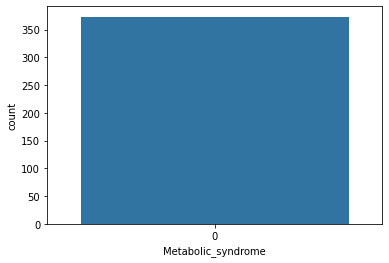

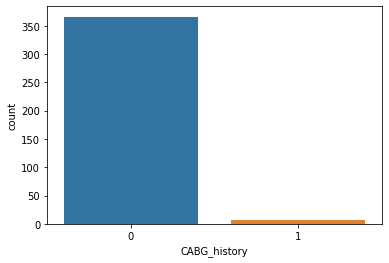

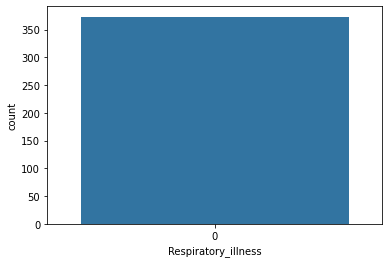

In [ ]:
plo(y1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

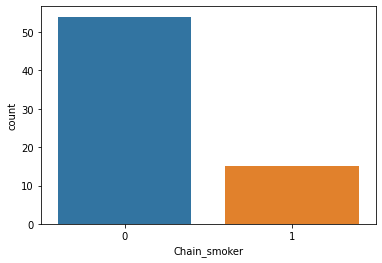

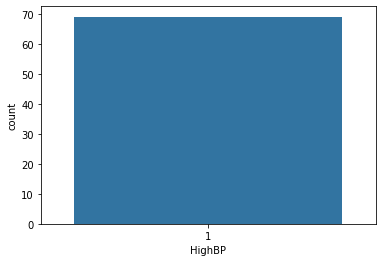

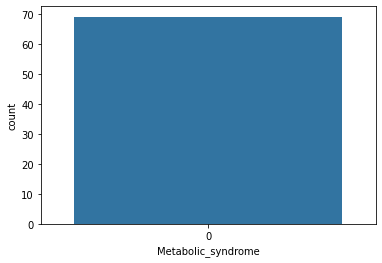

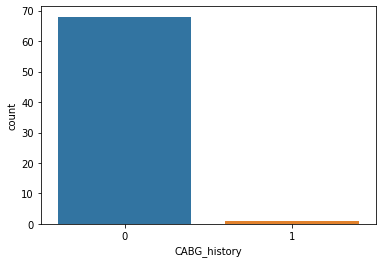

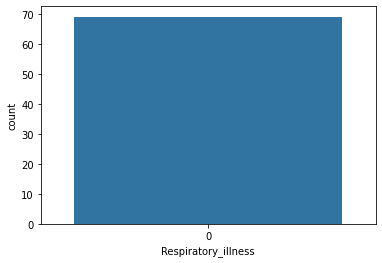

In [ ]:
plo(z1)

# Hierarchical cluster

In [ ]:
x

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,1,1,0,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0
885,1,0,1,0,1,0,0,0,1,0,0,0
886,1,0,0,1,1,0,0,0,1,0,0,0
887,2,0,1,0,0,0,0,1,1,0,0,0


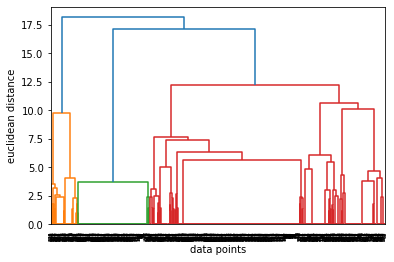

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(x, method = "ward")

dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=8)
cl=hc.fit_predict(x)

In [ ]:
x['label']=cl
x

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,label
0,1,1,1,0,1,0,0,0,1,0,0,0,2
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0,5
885,1,0,1,0,1,0,0,0,1,0,0,0,0
886,1,0,0,1,1,0,0,0,1,0,0,0,3
887,2,0,1,0,0,0,0,1,1,0,0,0,4


In [ ]:
x.label.value_counts()

0    385
5    191
1     91
3     63
2     60
6     37
4     35
7     27
Name: label, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,cl)

0.7361344645163592